In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation_slider_only import IPython_display

from sklearn.svm import SVC

class stepfit_1dim:
    def __init__(self):
        a = 0
        self.data = []
        self.cost_history = []
        self.x_orig = []
        
    # load in a two-dimensional dataset from csv - input should be in first column, oiutput in second column, no headers 
    def load_data(self,*args):

        ### make dataset
        num_pts = 20
        s = 2*np.random.rand(num_pts) - 1
        s.shape = (len(s),1)
        t = np.sign(s)
        t.shape = (len(t),1)

        # flip a few of the labels
        n = np.random.permutation(num_pts)
        n = n[0:3]
        for i in n:
            t[i] = (-1)*t[i]
        
        # save everything
        data = np.concatenate((s,t), axis = 1)
        data = pd.DataFrame(data)
        data.to_csv('1dim_logistic_data.csv',index = None)
        
        # store globals
        self.x = s
        self.y = t
        
        ### make target
        s = 2*np.linspace(0,1,200) - 1
        s.shape = (len(s),1)
        t = np.sign(s)
        t.shape = (len(t),1)
        
        # save everything
        data = np.concatenate((s,t), axis = 1)
        data = pd.DataFrame(data)
        data.to_csv('1dim_logistic_truefunc.csv',index = None)
        
        ### load data and true function
        data = np.asarray(pd.read_csv('1dim_logistic_data.csv'))  
        x = data[:,0:-1]
        y = data[:,-1]
        
        # load underlying function
        true_func = np.asarray(pd.read_csv('1dim_logistic_truefunc.csv'))
        x_true = true_func[:,0]
        y_true = true_func[:,1]
        
        # return globals
        self.x = x
        self.y = y
        self.x_true = x_true
        self.y_true = y_true
        
    # plot the data and underlying target function
    def plot_basics(self,**args):  
        # create figure / panel
        fig = plt.figure(num=None, figsize=(12,5), dpi=80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(121)
        ax2 = plt.subplot(122)

        # plot points
        pos_inds = np.argwhere(self.y > 0)
        pos_inds = [v[0] for v in pos_inds]
        ax1.scatter(self.x[pos_inds],self.y[pos_inds],color = 'salmon',linewidth = 1,marker = 'o',edgecolor = 'k',s = 170)
        ax2.scatter(self.x[pos_inds],self.y[pos_inds],color = 'salmon',linewidth = 1,marker = 'o',edgecolor = 'k',s = 170)

        neg_inds = np.argwhere(self.y < 0)
        neg_inds = [v[0] for v in neg_inds]
        ax1.scatter(self.x[neg_inds],self.y[neg_inds],color = 'cornflowerblue',linewidth = 1,marker = 'o',edgecolor = 'k',s = 170)
        ax2.scatter(self.x[neg_inds],self.y[neg_inds],color = 'cornflowerblue',linewidth = 1,marker = 'o',edgecolor = 'k',s = 170)

        # plot target
        pos_inds = np.argwhere(self.y_true > 0)
        pos_inds = [v[0] for v in pos_inds]
        ax2.plot(self.x_true[pos_inds],self.y_true[pos_inds],color = 'k',linewidth = 5,linestyle = '--',zorder = 1)
        
        neg_inds = np.argwhere(self.y_true < 0)
        neg_inds = [v[0] for v in neg_inds]
        ax2.plot(self.x_true[neg_inds],self.y_true[neg_inds],color = 'k',linewidth = 5,linestyle = '--',zorder = 1)
        
        # clean up panel
        xgap = float(max(self.x) - min(self.x))/float(10)
        ax1.set_xlim([-1.1,1.1])
        ax2.set_xlim([-1.1,1.1])

        ygap = float(max(self.y) - min(self.y))/float(10)
        ax1.set_ylim([-1.4,1.4])
        ax2.set_ylim([-1.4,1.4])

        ax1.set_xticks([])
        ax1.set_yticks([-1,1])
        ax1.set_yticklabels(['-1','+1'])
        ax1.tick_params(axis='y', labelsize=16)
        
        ax2.set_xticks([])
        ax2.set_yticks([-1,1])
        ax2.set_yticklabels(['-1','+1'])
        ax2.tick_params(axis='y', labelsize=16)
        
    # plot points
    def plot_points(self,ax):
        # plot points
        pos_inds = np.argwhere(self.y > 0)
        pos_inds = [v[0] for v in pos_inds]
        ax.scatter(self.x[pos_inds],self.y[pos_inds],color = 'salmon',linewidth = 1,marker = 'o',edgecolor = 'k',s = 100,zorder = 0)

        neg_inds = np.argwhere(self.y < 0)
        neg_inds = [v[0] for v in neg_inds]
        ax.scatter(self.x[neg_inds],self.y[neg_inds],color = 'cornflowerblue',linewidth = 1,marker = 'o',edgecolor = 'k',s = 100,zorder = 0)

        # plot target
        pos_inds = np.argwhere(self.y_true > 0)
        pos_inds = [v[0] for v in pos_inds]
        ax.plot(self.x_true[pos_inds],self.y_true[pos_inds],color = 'k',linewidth = 7,linestyle = '--',zorder = 1)

        neg_inds = np.argwhere(self.y_true < 0)
        neg_inds = [v[0] for v in neg_inds]
        ax.plot(self.x_true[neg_inds],self.y_true[neg_inds],color = 'k',linewidth = 7,linestyle = '--',zorder = 1)

        # clean up panel
        xgap = float(max(self.x) - min(self.x))/float(10)
        ax.set_xlim([-1.1,1.1])

        ygap = float(max(self.y) - min(self.y))/float(10)
        ax.set_ylim([-1.4,1.4])

        ax.set_xticks([])
        ax.set_yticks([-1,1])
        ax.set_yticklabels(['-1','+1'])
        ax.tick_params(axis='y', labelsize=14)
        
    # plot approximation
    def plot_approx(self,clf,domain,ax):
        # use regressor to make predictions
        z = clf.predict(domain)
        pos_ind = np.argwhere(z > 0)
        pos_ind = [v[0] for v in pos_ind]
        neg_ind = np.argwhere(z < 0)
        neg_ind = [v[0] for v in neg_ind]
        
        # plot regressor
        ax.plot(domain[pos_ind],z[pos_ind],linewidth = 3,color = 'm',zorder = 2)
        ax.plot(domain[neg_ind],z[neg_ind],linewidth = 3,color = 'm',zorder = 2)
        
        # clean up plot
        ax.set_xlim([-1.2,1.2])
        ax.set_ylim([-1.4,1.4])

    ### demo with animation or sliders - showing function approximation with polynoimal, neural network, and stumps/trees
    # polys
    def browse_poly_fit(self):
        # create figure / panel
        fig = plt.figure(num=None, figsize=(3,3), dpi=80, facecolor='w', edgecolor='k')
        ax1 = plt.subplot(111)
        
        # setup for plot
        r = np.linspace(-1,1,300)[:, np.newaxis]

        def show_fit(step):
            # Create classifier object and fit
            classifier = SVC(kernel = 'poly',degree = step+1)
            classifier.fit(self.x, self.y)        

            # plot data points
            self.plot_points(ax1)
            
            # plot approximation
            self.plot_approx(classifier,r,ax1)
            
            # title
            artist = ax1.set_title('degree = ' + str(step+1))

            return artist,
        
        # generate aniamtion
        anim = animation.FuncAnimation(fig, show_fit,frames=10, interval=10, blit=True)
        
        # set frames per second in animation
        IPython_display.anim_to_html(anim,fps = 10)
        
        return(anim)        

In [41]:
%matplotlib inline
data_name = '1dim_logistic_data.csv'
target_name = '1dim_logistic_truefunc.csv'
demo = stepfit_1dim()
demo.load_data(data_name,target_name)
# demo.plot_basics()


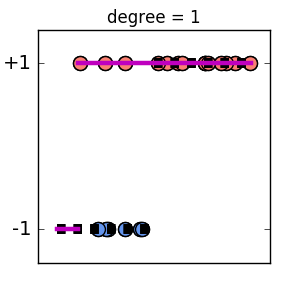
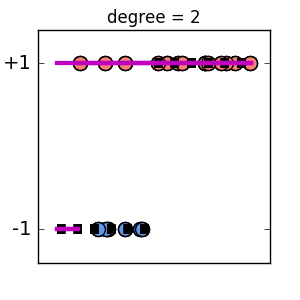
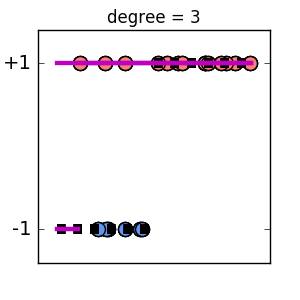
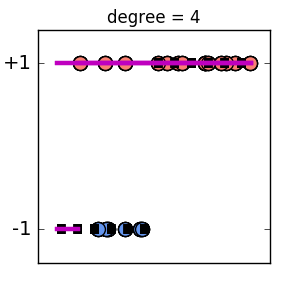
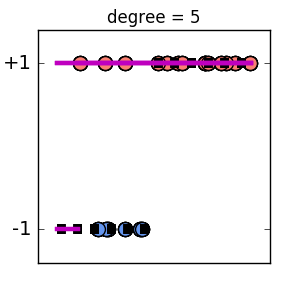
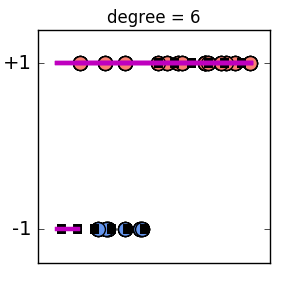
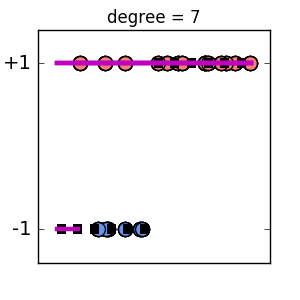
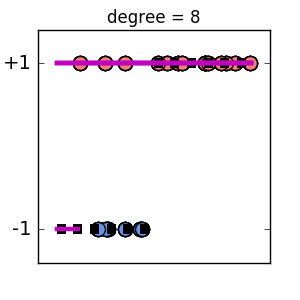
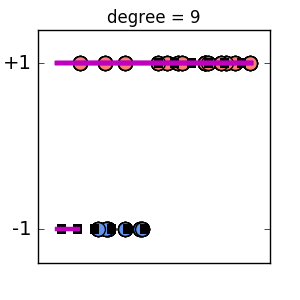
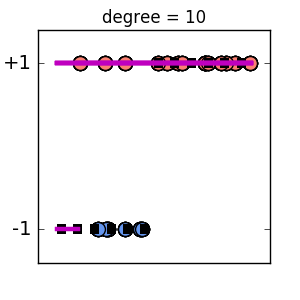

In [42]:
demo.browse_poly_fit()